In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [27]:
def intitialise_potential(N, initial, threshold): # initial defines the fraction of populations that is initially infected
    P = {} # another graph to keep track of potential
    nodes = N.keys()
    for node in nodes:
        if random.random() < initial:
            P[node] = threshold
        else:
            P[node] = 0
    return P

def find_connections(network):
    nodes = list(network.keys())
    connections = []
    for i in range(len(network)):
        connections.append(network[nodes[i]][0])
    return connections
        
def find_strengths(network):
    nodes = list(network.keys())
    strengths = []
    for i in range(len(network)):
        strengths.append(network[nodes[i]][1])
    norm = max(max(s) for s in strengths)
    return strengths, norm

def weighted_propagate_SI(P, N, threshold, strength = 1, beta = 0.6): # add checks for valid parameter values
    connections = find_connections(N)
    strengths , norm = find_strengths(N)
    potentials = list(P.values())
    size = len(N)
    F = np.zeros(size)
    for i in range(size): # loop over every node and check if firing
        if potentials[i] >= threshold:
            if np.random.random() < beta:
                F[i] = 1
        for j in range(len(connections[i])):    
            if np.random.random() < beta: #0.6 is placeholder value for beta
                P[connections[i][j]] += strengths[i][j] * strength / norm 
    return P, F

def simulate_SI(N, P, T, h, threshold):
    size = len(N)
    activity = []
    limit = T 
    for t in range(limit):
        #time.sleep(1)
        P, F = weighted_propagate_SI(P, N, threshold)
        activity.append(sum(F) / size)
    return activity

def smooth_SI(N, I, T, M, h, threshold = 10): # M is number of runs over which to smooth over
    runs = []
    limit = int(T//h) + 1
    limit = T
    for i in range(M):
        P = intitialise_potential(N, I, threshold)
        run = simulate_SI(N, P, T, h, threshold)
        runs.append(run)
    smoothed = []
    for i in range(limit):
        total = 0
        for j in range(M):
            total += runs[j][i]     
        total = total / M   
        smoothed.append(total)
    return smoothed

def generate_t(T, h): # generates time axis from 0 to T with increments of h
    return np.arange(0, T, h)

In [8]:
def access_dataset(name):
    data = open(name, 'r')
    lines = data.readlines() 
    lines = [line.split() for line in lines] # 2D array containing lines from data, split into words stored as strings
    return lines

def build_dict_1(network, lines):
    for i in range(len(lines)): # This works! but generates a directed network
        a = lines[i][1] # first person in interaction
        b = lines[i][2] # second person in interaction
        
        try: # editing an existing node
            if b in network[a][0]:
                index = network[a][0].index(b)
                network[a][1][index] += 1 # increasing interaction strength
            else:
                network[a][0].append(b)
                network[a][1].append(1)
        except: # adding new interaction
            network[a] = [[b], [1]]
    
    return network

def build_dict_2(network, lines):
    for i in range(len(lines)): # This works! but generates a directed network
        b = lines[i][1] # first person in interaction
        a = lines[i][2] # second person in interaction
        
        try: # editing an existing node
            if b in network[a][0]:
                index = network[a][0].index(b)
                network[a][1][index] += 1 # increasing interaction strength
            else:
                network[a][0].append(b)
                network[a][1].append(1)
        except: # adding new interaction
            network[a] = [[b], [1]]
    
    return network 
    
def build_network(name):
    lines = access_dataset(name)
    network = {}
    network = build_dict_1(network, lines)
    network = build_dict_2(network, lines)
    return network

0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7


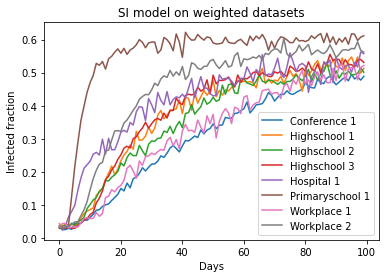

In [52]:
T = 100 # days over which we simulate
h = 0.1 # time increment
I = 0.05 # initial infected fraction
b = 0.8 # transmission rate of contagion
M = 5 # number of runs to smooth model over

dataset_paths = [
'Sociopatterns datasets/conference_2009.dat_',
'Sociopatterns datasets/highschool_2011.csv',
'Sociopatterns datasets/highschool_2012.csv',
'Sociopatterns datasets/highschool_2013.csv',
'Sociopatterns datasets/hospital_2010.dat_',
'Sociopatterns datasets/primaryschool_2014.csv',
'Sociopatterns datasets/workplace_2013.dat',
'Sociopatterns datasets/workplace_2015.dat_']

dataset_names = [
    'Conference 1', 
    'Highschool 1', 
    'Highschool 2', 
    'Highschool 3', 
    'Hospital 1', 
    'Primaryschool 1', 
    'Workplace 1', 
    'Workplace 2']

networks = []

for i in range(len(dataset_paths)):
    networks.append(build_network(dataset_paths[i]))
    print(i)

t = generate_t(T, 1)

models = []
for i in range(len(dataset_paths)):
    model_SI = smooth_SI(networks[i], I, T, M, h, 5)
    models.append(model_SI)
    print(i)

for i in range(len(dataset_paths)):
    plt.plot(t, models[i], label = dataset_names[i])

plt.legend(loc = 'lower right')
plt.xlabel('Days')
plt.ylabel('Infected fraction')
plt.title('SI model on weighted datasets')
plt.show()

In [20]:
a = [[1,2,3,], [1,1,4]]
max(max(b) for b in a)

4

In [26]:
_, norm = find_strengths(network)
print(norm)

737


Test:

    - removing unsubstantial connections and moving weight to stronger connections